#Import the required libraries

We will start by importing the libraries necessary to our project:

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

Load Data

Dataset: https://www.kaggle.com/samuelmcguire/wine-reviews-data

# Fase 2: Pre Procesado de Datos

## Carga de Ficheros

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fuente del dataset: https://www.kaggle.com/itachi9604/disease-symptom-description-dataset?select=dataset.csv

In [3]:
data = pd.read_csv('/content/drive/Othercomputers/Mi PC/02. Programacion/Proyectos/predicción de enfermedades/dataset.csv')

print(data.shape)

total_nan_values = data.isnull().sum()
print (total_nan_values)

(4920, 18)
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [4]:
data.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.fillna('', inplace=True)

In [6]:
data["sym"] = data["Symptom_1"].astype(str) + data["Symptom_2"].astype(str)+ data["Symptom_3"].astype(str)+ data["Symptom_4"].astype(str)+ data["Symptom_5"].astype(str)+ data["Symptom_6"].astype(str)+ data["Symptom_7"].astype(str)+ data["Symptom_8"].astype(str)+ data["Symptom_9"].astype(str)+ data["Symptom_10"].astype(str)+ data["Symptom_11"].astype(str)+ data["Symptom_12"].astype(str)+ data["Symptom_13"].astype(str)+ data["Symptom_14"].astype(str)+ data["Symptom_15"].astype(str)+ data["Symptom_16"].astype(str)+ data["Symptom_17"].astype(str)

In [7]:
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,sym
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,itching skin_rash nodal_skin_eruptions dischromic _patches
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,,skin_rash nodal_skin_eruptions dischromic _patches
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,,itching nodal_skin_eruptions dischromic _patches
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,,itching skin_rash dischromic _patches
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,,itching skin_rash nodal_skin_eruptions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,,,,,,,,,,,,vomiting headache nausea spinning_movements loss_of_balance unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,,,,,,,,,,,,,,skin_rash pus_filled_pimples blackheads scurring
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,,,,,,,,,,,,,,burning_micturition bladder_discomfort foul_smell_of urine continuous_feel_of_urine
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,,,,,,,,,,,,skin_rash joint_pain skin_peeling silver_like_dusting small_dents_in_nails inflammatory_nails


In [8]:
data.drop(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13',	'Symptom_14',	'Symptom_15',	'Symptom_16',	'Symptom_17'], axis=1, inplace=True)

In [9]:
data.isnull().sum()

Disease    0
sym        0
dtype: int64

In [10]:
data

,Disease,sym
0,Fungal infection,itching skin_rash nodal_skin_eruptions dischromic _patches
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic _patches
2,Fungal infection,itching nodal_skin_eruptions dischromic _patches
3,Fungal infection,itching skin_rash dischromic _patches
4,Fungal infection,itching skin_rash nodal_skin_eruptions
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting headache nausea spinning_movements loss_of_balance unsteadiness
4916,Acne,skin_rash pus_filled_pimples blackheads scurring
4917,Urinary tract infection,burning_micturition bladder_discomfort foul_smell_of urine continuous_feel_of_urine
4918,Psoriasis,skin_rash joint_pain skin_peeling silver_like_dusting small_dents_in_nails inflammatory_nails


In [11]:
# how many diseases have been covered in this dataset?
len(set(data['Disease']))

41

In [12]:
data['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [13]:
#Text cleaning

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [14]:
data['sym'] = data['sym'].apply(lambda x: clean_text(x))

In [15]:
data['Disease'] = data['Disease'].apply(lambda x: clean_text(x))

In [16]:
data['Disease']

0                           fungal infection
1                           fungal infection
2                           fungal infection
3                           fungal infection
4                           fungal infection
                        ...                 
4915    vertigo paroymsal positional vertigo
4916                                    acne
4917                 urinary tract infection
4918                               psoriasis
4919                                impetigo
Name: Disease, Length: 4920, dtype: object

In [17]:
data['sym'].unique()

array(['itching skin rash nodal skin eruptions dischromic patches',
       'skin rash nodal skin eruptions dischromic patches',
       'itching nodal skin eruptions dischromic patches',
       'itching skin rash dischromic patches',
       'itching skin rash nodal skin eruptions',
       'continuous sneezing shivering chills watering from eyes',
       'shivering chills watering from eyes',
       'continuous sneezing chills watering from eyes',
       'continuous sneezing shivering watering from eyes',
       'continuous sneezing shivering chills',
       'stomach pain acidity ulcers on tongue vomiting cough chest pain',
       'stomach pain ulcers on tongue vomiting cough chest pain',
       'stomach pain acidity vomiting cough chest pain',
       'stomach pain acidity ulcers on tongue cough chest pain',
       'stomach pain acidity ulcers on tongue vomiting chest pain',
       'stomach pain acidity ulcers on tongue vomiting cough',
       'acidity ulcers on tongue vomiting cough che

In [18]:
data

,Disease,sym
0,fungal infection,itching skin rash nodal skin eruptions dischromic patches
1,fungal infection,skin rash nodal skin eruptions dischromic patches
2,fungal infection,itching nodal skin eruptions dischromic patches
3,fungal infection,itching skin rash dischromic patches
4,fungal infection,itching skin rash nodal skin eruptions
...,...,...
4915,vertigo paroymsal positional vertigo,vomiting headache nausea spinning movements loss of balance unsteadiness
4916,acne,skin rash pus filled pimples blackheads scurring
4917,urinary tract infection,burning micturition bladder discomfort foul smell of urine continuous feel of urine
4918,psoriasis,skin rash joint pain skin peeling silver like dusting small dents in nails inflammatory nails


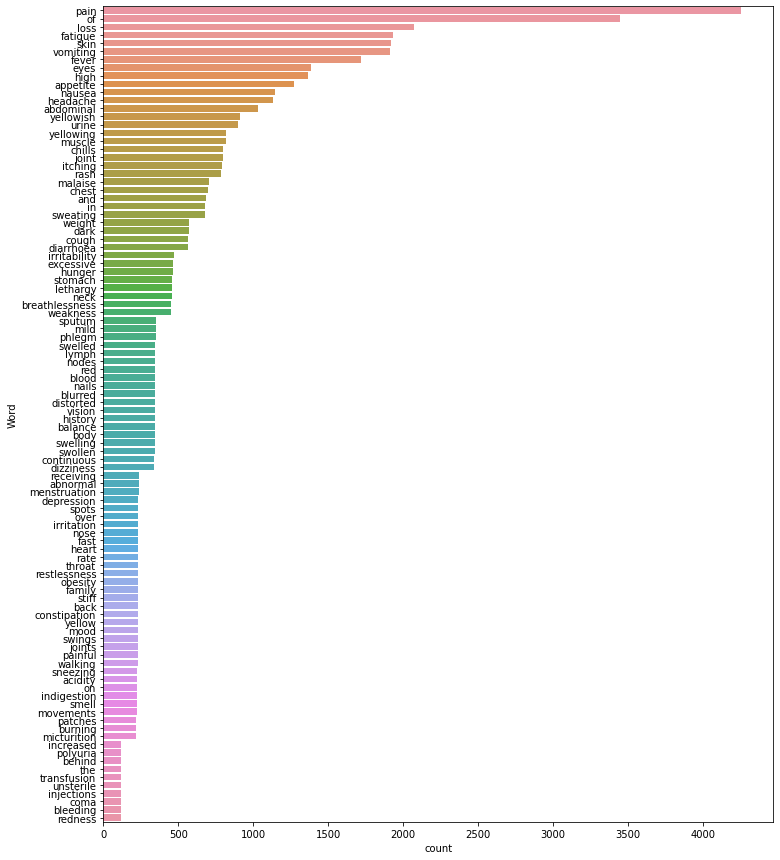

In [19]:
#cleaning stop words

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
#print 100 most frequent words 
freq_words(data['sym'], 100)

In [20]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['sym'] = data['sym'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#Check

#freq_words(data['sym'], 100)

#Converting Text to Features

In [22]:
#data['Disease']=data['Disease'].astype(str)

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['Disease'])

# transform target variable
y = multilabel_binarizer.transform(data['Disease'])

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000) #10,000 most frequent words

In [25]:
#split our data into train and validation sets for training and evaluating

xtrain, xval, ytrain, yval = train_test_split(data['sym'], y, test_size=0.5, random_state=9)

In [26]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

WWW

In [27]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [28]:
# We will use sk-learn’s OneVsRestClassifier class to solve this problem as a Binary Relevance or one-vs-all problem:

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [29]:
# Finally, fit the model on the train set:

clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [30]:
# make predictions for validation set

y_pred = clf.predict(xval_tfidf)

In [31]:
# Let’s check out a sample from these predictions:

y_pred[3] #array of 41 diseases

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1])

It is a binary one-dimensional array of length 40. Basically, it is the one-hot encoded form of the unique genre tags. We will have to find a way to convert it into deseases.

Luckily, sk-learn comes to our rescue once again. We will use the inverse_transform( ) function along with the MultiLabelBinarizer( ) object to convert the predicted arrays into movie genre tags:

In [32]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('d', 'h', 'i', 'm', 'o', 'p', 'r', 's', 't', 'y')

In [33]:
# To evaluate our model’s overall performance

f1_score(yval, y_pred, average="micro")

0.9990113692535837

In [34]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.4 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [35]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.9991468343062415

#Take a movie plot text and follow the below steps

In [36]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [37]:
q_new = input("Enter the review: ")

print(infer_tags(q_new))

Enter the review: pain
[(' ', 'a', 'd', 'e', 'o', 'r')]
